# This project is involves scraping information about kettles from the Flipkart website for further data manipulation and visualization

In [36]:
# Import relevant libraries
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# Get relevant data from the website and convert it into a beautifulsoup object
link = "https://www.flipkart.com/electric-jugheatertravel-kettles/pr?sid=j9e%2Cm38%2Cxrv&otracker=nmenu_sub_Appliances_0_Electric%20Kettle&otracker=nmenu_sub_TVs%20%26%20Appliances_0_Electric%20Kettle"
page = requests.get(link)
soup = bs(page.content,'html.parser')
results = soup.find_all('div',{'class':'_4ddWXP'})

# Create lists to store specific data
kettle_name = []
price = []
rating = []

# Create a loop that iterates through the data and also handles missing data
for result in results:

    try:
       names = kettle_name.append(result.find('a',href=True,attrs={'class':'s1Q9rs'}).get_text()) 
    except:
        names = kettle_name.append('n/a') 
   
    try:
       prices = price.append(result.find('div',class_='_30jeq3').get_text())
    except:
        prices = price.append('n/a') 

    try:
       ratings = rating.append(result.find('div',{'class':'_3LWZlK'}).get_text())
    except:
        ratings = rating.append('n/a') 

# Create a loop that removes currency symbols and commas and convert to float        
for i in range(len(price)):
    try:
        
        price[i] = float(price[i].replace('₹', '').replace(',', ''))
    except ValueError:
        price[i] = np.nan

# Structure and store the data        
df = pd.DataFrame({'Product_Name':kettle_name,'Product_Price':price,'Product_Rating':rating})
print(df.to_string())

kettle = df.to_csv('C:\\Users\\Tsholofelo Molefe\\Desktop\\Notebooks\\kettle.csv', index= False)

                                                  Product_Name  Product_Price Product_Rating
0                                 ZunVolt 1.5L Electric Kettle          425.0              4
1                                HAVELLS Altro Electric Kettle         1399.0            4.4
2                             Pigeon Favourite Electric Kettle          599.0            4.1
3                     Pigeon 14913 Electric Kettle with Bottle          699.0            4.1
4                             Pigeon Favourite Electric Kettle          899.0              4
5   Butterfly Rapid Kettle 1.5 Litre + Eco 750 Ml Water Bot...          849.0            4.3
6                              Butterfly Rapid Electric Kettle          625.0            4.2
7                   JAYPANO Kettleup Combo Set Electric Kettle         1299.0              3
8                                Pigeon Quartz Electric Kettle          649.0              4
9                      Flipkart SmartBuy Prime Electric Kettle        

# Import the DataFrame and clean it by dropping missing values

In [37]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('C:\\Users\\Tsholofelo Molefe\\Desktop\\Notebooks\\kettle.csv') # Import the DataFrame
df_cleaned = df.dropna() # Clean by dropping missing values

df_cleaned

,Product_Name,Product_Price,Product_Rating
0,ZunVolt 1.5L Electric Kettle,425.0,4.0
1,HAVELLS Altro Electric Kettle,1399.0,4.4
2,Pigeon Favourite Electric Kettle,599.0,4.1
3,Pigeon 14913 Electric Kettle with Bottle,699.0,4.1
4,Pigeon Favourite Electric Kettle,899.0,4.0
5,Butterfly Rapid Kettle 1.5 Litre + Eco 750 Ml ...,849.0,4.3
6,Butterfly Rapid Electric Kettle,625.0,4.2
7,JAYPANO Kettleup Combo Set Electric Kettle,1299.0,3.0
8,Pigeon Quartz Electric Kettle,649.0,4.0
9,Flipkart SmartBuy Prime Electric Kettle,500.0,4.1


# Visualization of the data using Matplotlib and Seaborn libraries

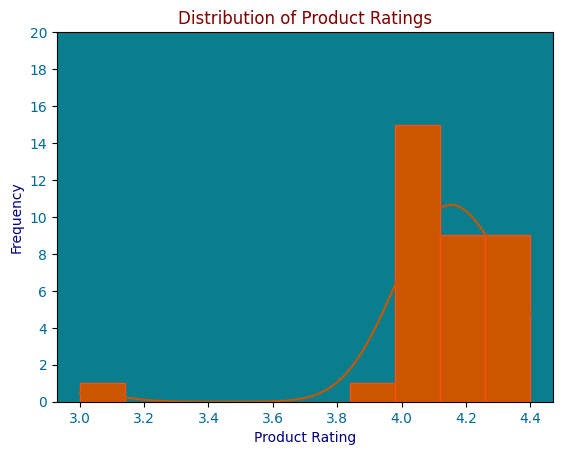

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


# Create the histogram plot
ax = sns.histplot(df_cleaned['Product_Rating'],facecolor='#cc5500',edgecolor='#fb4f14',bins=10,kde=True )

# Set the x and y-axis labels, y-limit, x and y ticks and title
ax.grid(False)
ax.set_facecolor('#0a7e8c')
plt.xlabel('Product Rating',color='#000080')
plt.ylabel('Frequency',c='#000080')
plt.yticks(color='#006994')
plt.xticks(color='#006994')
plt.ylim(0,20)
plt.title('Distribution of Product Ratings',color='#800000')

# Customize y-axis ticks
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=2))

plt.show()


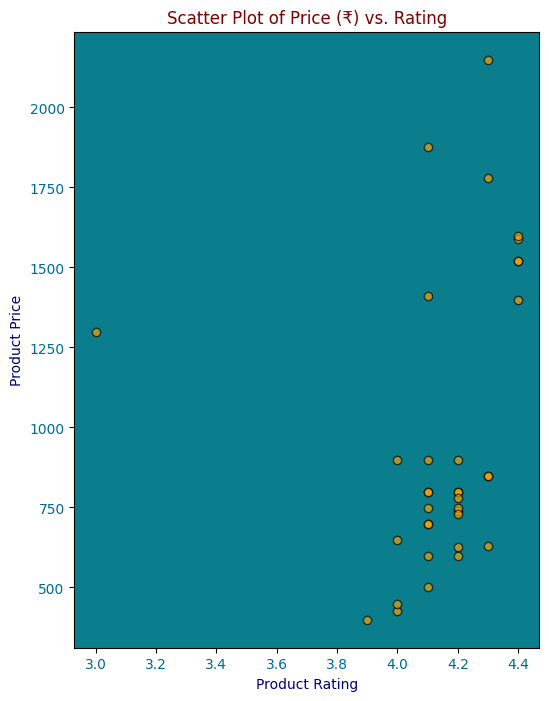

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# define size of the scatterplot
plt.figure(figsize=(6, 8))

# Create the scatter plot
ax=sns.scatterplot(x='Product_Rating',y='Product_Price',data=df_cleaned,edgecolor='black',linewidth=1,c='orange',alpha=0.65)
ax.set_facecolor('#0a7e8c')
plt.xlabel('Product Rating',color='#000080')
plt.ylabel('Product Price',c='#000080')
plt.yticks(color='#006994')
plt.xticks(color='#006994')
plt.title('Scatter Plot of Price (₹) vs. Rating',color='#800000')

plt.show()